### Analyze run

In [1]:
from os import path
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import matplotlib.pyplot as plt

In [2]:
BASE_DIR = "/home/datascience/yolov8/runs/detect"
RUN_NAME = "train"
RUN_LOG = "results.csv"

FILE_NAME = path.join(BASE_DIR, RUN_NAME, RUN_LOG)

In [3]:
results_df = pd.read_csv(FILE_NAME)

results_df.tail()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
4,5,2.8283,3.0915,2.9600,0.00005,0.01220,0.00003,0.00000,5.1432,4.7624,4.4929,0.001438,0.001438,0.001438
5,6,2.9071,2.8503,2.9404,0.00090,0.01220,0.00046,0.00014,nan,nan,nan,0.001717,0.001717,0.001717
6,7,2.5522,2.5531,2.6886,0.28942,0.19512,0.10678,0.03230,nan,nan,nan,0.001915,0.001915,0.001915
7,8,2.5723,2.7309,2.7620,0.04984,0.36585,0.02855,0.00923,2.7089,57.461,3.6253,0.001915,0.001915,0.001915
8,9,2.5655,2.3516,2.6523,0.18188,0.24390,0.07470,0.02321,3.1423,4.5048,3.249,0.001901,0.001901,0.001901


In [4]:
def plot_metric(which, df):
    if which == "Precision":
        col = 4
    if which == "Recall":
        col = 5
    if which == "mAP50-95":
        col = 7

    vet_epochs = df[df.columns[0]].values
    vet_values = df[df.columns[col]].values

    plt.plot(vet_epochs, vet_values)
    plt.grid(True)
    plt.title(which)
    plt.xlabel("Epochs")
    plt.ylabel(which)

### Precision and Recall

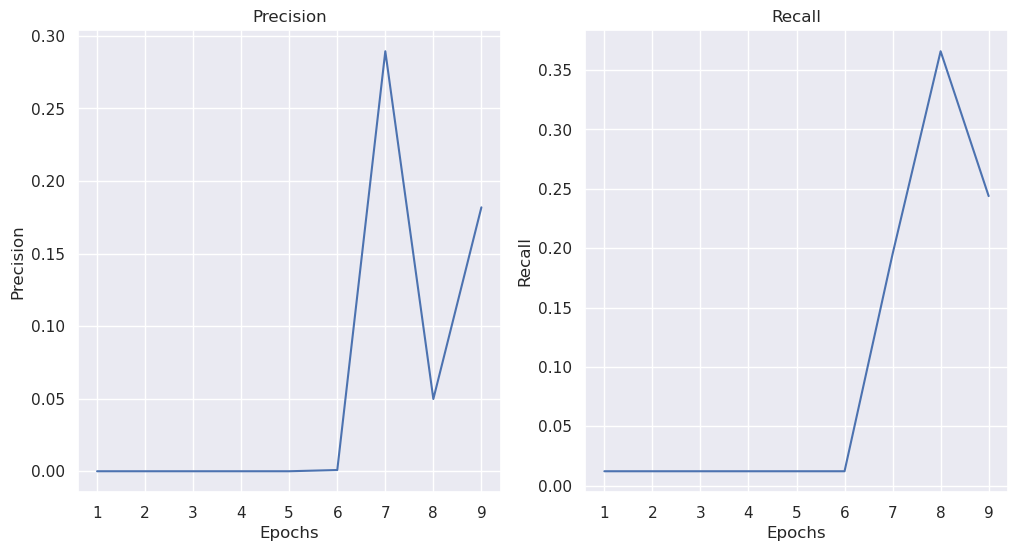

In [5]:
# one grid for two plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plot_metric("Precision", results_df)
plt.subplot(1, 2, 2)
plot_metric("Recall", results_df)

### mAP50-95

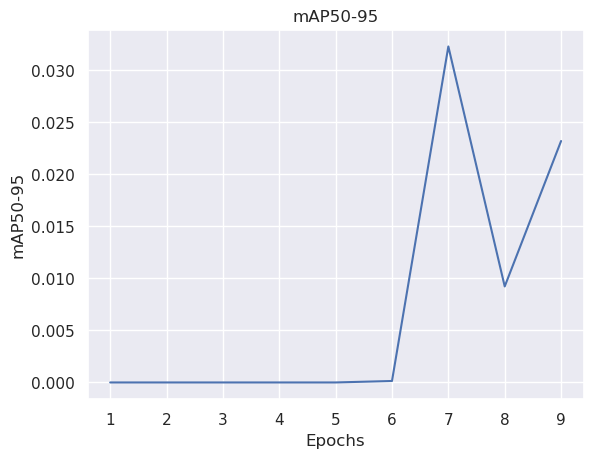

In [6]:
plot_metric("mAP50-95", results_df)